#  Data Analytics II - Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


array([[<AxesSubplot:title={'center':'User ID'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'EstimatedSalary'}>,
        <AxesSubplot:title={'center':'Purchased'}>]], dtype=object)

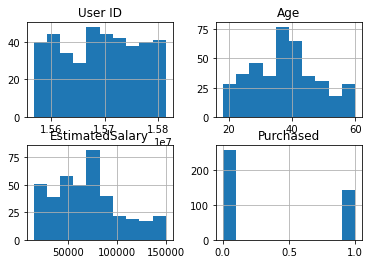

In [3]:
df.hist()

In [4]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
df.dropna()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


<AxesSubplot:>

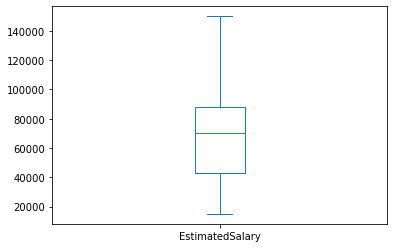

In [6]:
df['EstimatedSalary'].plot.box() ##whisker boxplot min median max Q1 Q2 Q3

In [7]:
df.drop('Gender',axis=1,inplace=True)

In [8]:
df.drop('User ID',axis=1,inplace=True)

In [9]:
x = df.drop('Purchased',axis=1)  #drop column 
y = df['Purchased']

In [10]:
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [11]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [12]:
x.shape

(400, 2)

In [13]:
y.shape

(400,)

## Train Test Split

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [15]:
x_train.shape

(300, 2)

In [16]:
x_test.shape

(100, 2)

## Feature Scaling

In [17]:
from sklearn.preprocessing import  StandardScaler

In [18]:
std = StandardScaler()

In [19]:
x_train = std.fit_transform(x_train)
x_test = std.fit_transform(x_test)

## Model Training

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,Y_train)

LogisticRegression()

In [21]:
y_predict = model.predict(x_test)

In [22]:
y_predict

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

## Performance Evaluation

In [23]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

In [24]:
a_score = accuracy_score(Y_test,y_predict)
a_score

0.87

In [25]:
pre_score = precision_score(Y_test,y_predict)
pre_score

0.8275862068965517

In [26]:
rec_score= recall_score(Y_test,y_predict)
rec_score

0.75

## Confusion Matrix

In [27]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [28]:
cm = confusion_matrix(Y_test,y_predict)

In [29]:
cm

array([[63,  5],
       [ 8, 24]])

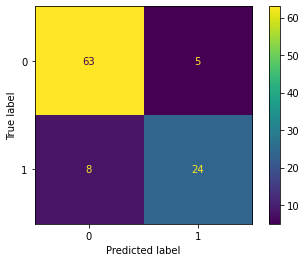

In [30]:
cm_d = ConfusionMatrixDisplay(cm).plot()

## Predict over new value

In [31]:
p_value = [(46,41000)]
new_predict  = model.predict(p_value)

In [32]:
new_predict

array([1])

In [51]:
# for  in range(len(y_predict)):
#     print(Y_test[i],y_predict[i])

In [59]:
# for i,p  in y_predict:
#     print(Y_test[i],y_predict[p])

## Classfication Report

In [42]:
from sklearn.metrics import classification_report
report = classification_report(Y_test,y_predict)

In [43]:
print(report)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        68
           1       0.83      0.75      0.79        32

    accuracy                           0.87       100
   macro avg       0.86      0.84      0.85       100
weighted avg       0.87      0.87      0.87       100

